In [1]:
import os
import sys
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
sys.path.append(base_path)
from pdf_data_extractor.src.searchable_pdf import SearchablePDF

In [2]:
import json
from pdf_data_extractor.src.utils import * 
pdf_path = os.path.join(base_path, 'demo_data/he-specification.pdf')
json_schema_path = os.path.join(base_path, 'demo_data/he-specification_schema.json')
json_value_path = os.path.join(base_path, 'demo_data/he-specification.json')
 
json_value_string = readJsonFile(json_value_path)
json_schema_string = readJsonFile(json_schema_path)

In [3]:
from pdf_data_extractor.src.single_page_pdf import SinglePagePDF
pdf = SinglePagePDF(pdf_path)

In [29]:
[p for p in pdf.page_dict["blocks"] if "bbox" in p]

[{'number': 0,
  'type': 0,
  'bbox': (265.070556640625,
   414.1910095214844,
   571.8997802734375,
   423.1910095214844),
  'lines': [{'spans': [{'size': 9.0,
      'flags': 0,
      'font': 'Calibri',
      'color': 0,
      'ascender': 0.75,
      'descender': -0.25,
      'text': 'SP. HEAT CAPACITY',
      'origin': (265.070556640625, 420.9410095214844),
      'bbox': (265.070556640625,
       414.1910095214844,
       335.5830383300781,
       423.1910095214844)}],
    'wmode': 0,
    'dir': (1.0, 0.0),
    'bbox': (265.070556640625,
     414.1910095214844,
     335.5830383300781,
     423.1910095214844)},
   {'spans': [{'size': 9.0,
      'flags': 0,
      'font': 'Calibri',
      'color': 0,
      'ascender': 0.75,
      'descender': -0.25,
      'text': 'INLET TEMP.',
      'origin': (346.4305419921875, 420.9410095214844),
      'bbox': (346.4305419921875,
       414.1910095214844,
       392.7395935058594,
       423.1910095214844)}],
    'wmode': 0,
    'dir': (1.0, 0.0),
  

(265.070556640625, 420.9410095214844) SP. HEAT CAPACITY
(346.4305419921875, 420.9410095214844) INLET TEMP.
(410.87054443359375, 420.9410095214844) OUTLET TEMP.
(475.310546875, 420.9410095214844) FLOW RATE. LIQUID VOL.
(265.070556640625, 435.46099853515625) 4190 J/kg/K
(346.4305725097656, 435.46099853515625) 68 °C
(410.8705749511719, 435.46099853515625) 89 °C
(475.3105773925781, 435.46099853515625) 46 kg/s
(526.9105834960938, 435.46099853515625) 400 dm3
(265.070556640625, 449.74102783203125) 4190 J/kg/K
(346.4305419921875, 449.74102783203125) 91 °C
(410.87054443359375, 449.74102783203125) 74 °C
(475.310546875, 449.74102783203125) 56 kg/s
(526.9075317382812, 449.74102783203125) 400 dm3
(250.91055297851562, 71.5009765625) Heat-Exchanger Specification
(172.1905517578125, 83.74102783203125) SUPPLIER
(172.1905517578125, 207.82403564453125) REF.
(172.1905517578125, 272.38104248046875) ITEM NO.
(130.18756103515625, 83.7410888671875) CUSTOMER NAME
(185.75054931640625, 83.74102783203125) WEIGHT 

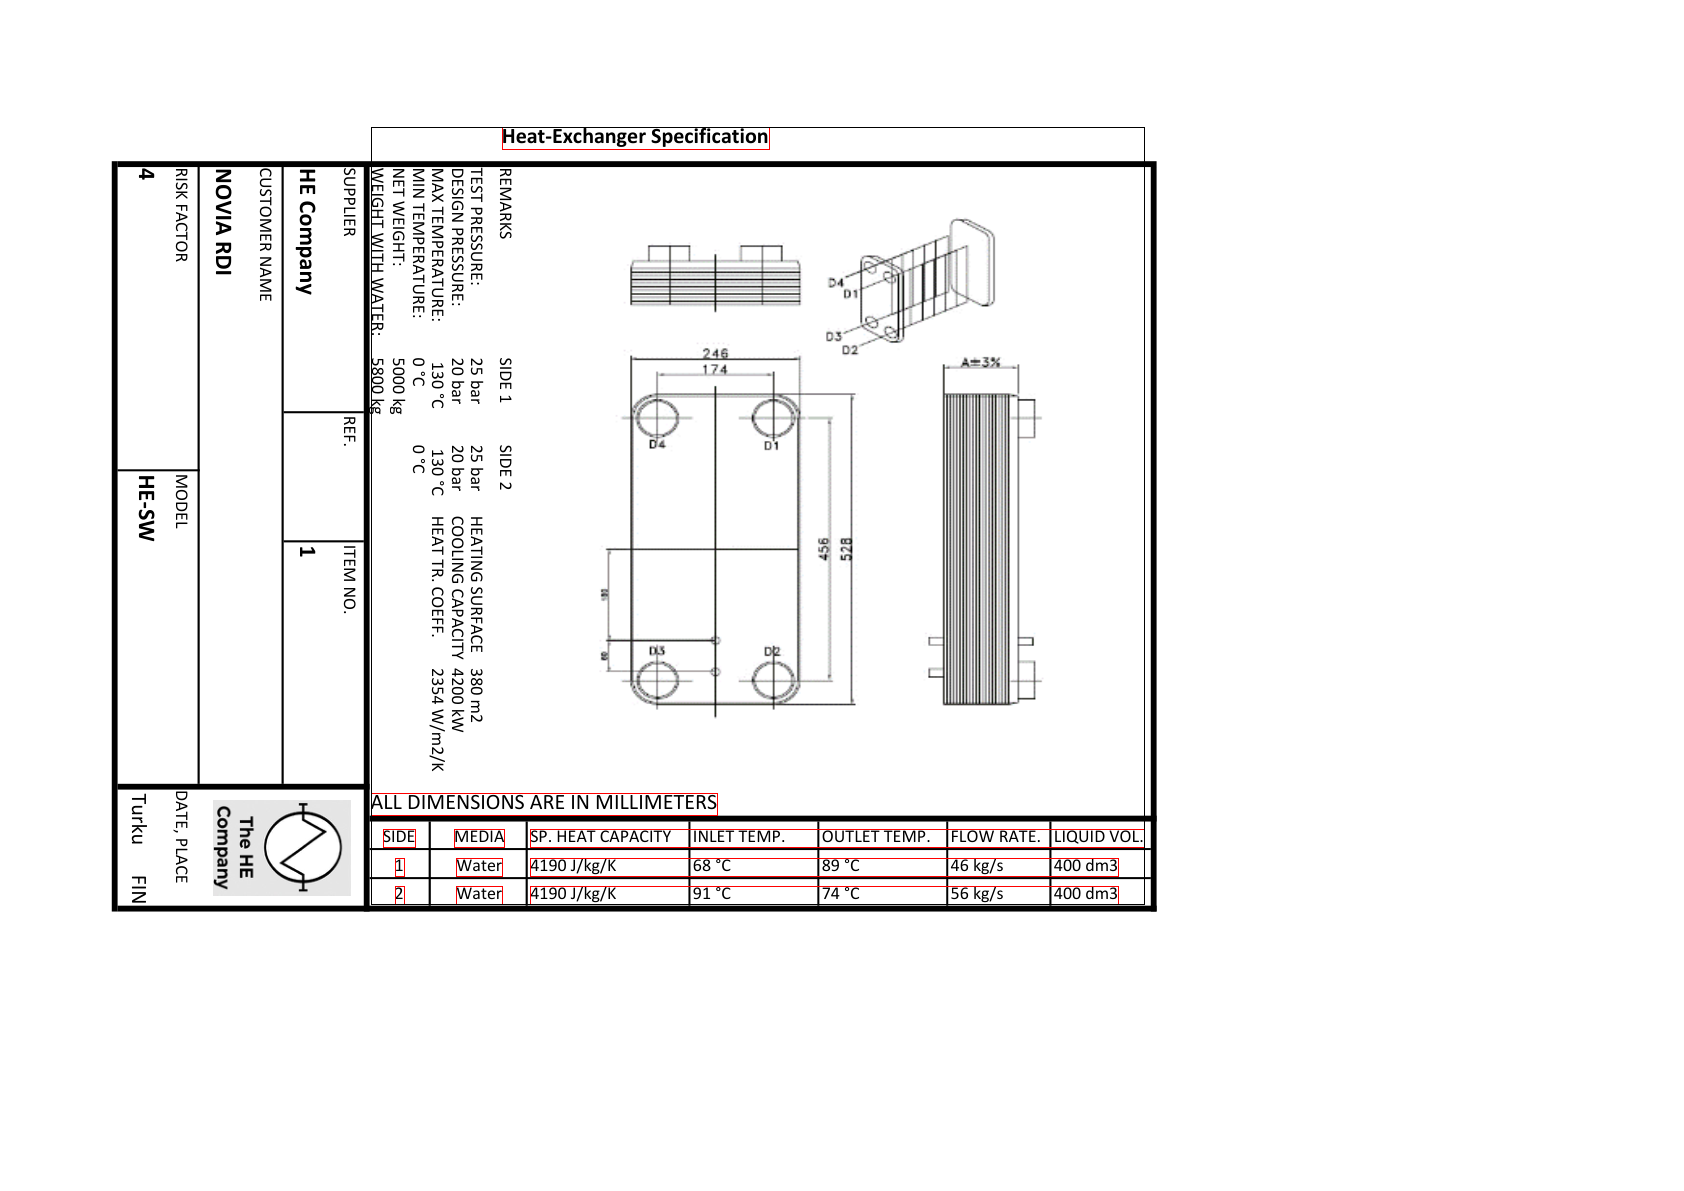

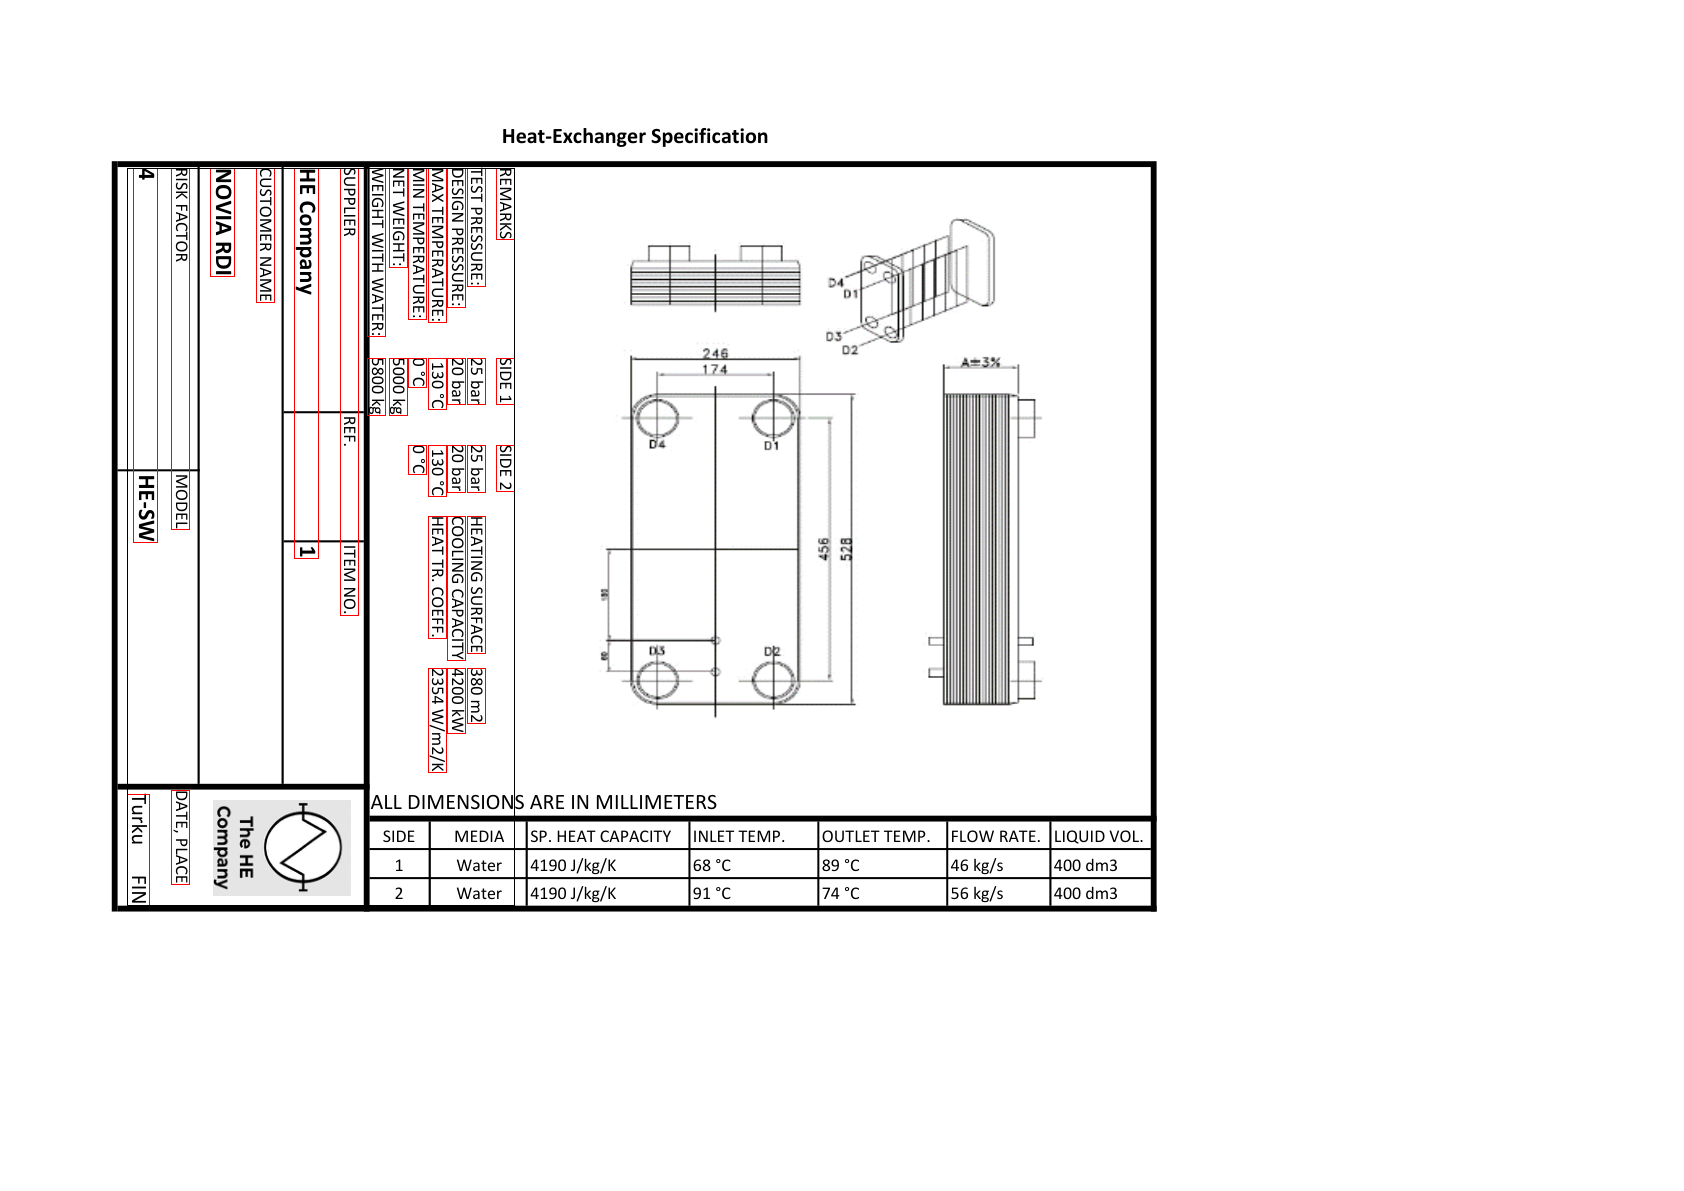

In [164]:
%matplotlib inline
import fitz
from PIL import Image, ImageDraw, ImageFont
from pdf_data_extractor.src.utils import draw_rects, pdf_coords_to_img_coords, extraction_wrapper
 
groupd_ = extract_bboxes_and_dirs(pdf.page_dict)
 
pdf_height, pdf_width = pdf.dimensions
 
pix = pdf.page.get_pixmap(matrix=fitz.Matrix(2, 2))
#pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

imgs = {}
im_draws = {}
def get_im_draw(key, w, h):
    if key not in imgs:
        #imgs[key] = Image.new("RGB", [w, h], "white")
        imgs[key] = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        im_draws[key] = ImageDraw.Draw(imgs[key])
    return im_draws[key]

boxes = {}
def update_boxes(key, bbox):
    if key not in boxes:
        boxes[key] = bbox

    boxes[key] = (
        min(boxes[key][0], bbox[0]),
        min(boxes[key][1], bbox[1]),
        max(boxes[key][2], bbox[2]),
        max(boxes[key][3], bbox[3])
    )


for index, block in enumerate(pdf.page_dict["blocks"]):
    im_bbox = pdf_coords_to_img_coords(block["bbox"], pdf_height, pdf_width, pix.width, pix.height)
    for line in block["lines"]:
        update_boxes(str(line["dir"]), pdf_coords_to_img_coords(line["bbox"], pdf_height, pdf_width, pix.width, pix.height))
        im_draw = get_im_draw(str(line["dir"]), pix.width, pix.height)
        im_draw.rectangle(im_bbox, outline = "red")
        font = ImageFont.load_default()
        im_draw.text([0,0], "hello", font=font)

        for span in line["spans"]:
            print(span["origin"], span["text"])
            text_origin = pdf_coords_to_img_coords(span["bbox"], pdf_height, pdf_width, pix.width, pix.height)
            #im_draw.text((text_origin[0], text_origin[1]), span["text"], fill="black", font=font)

for key, bbox in boxes.items():
    im_draws[key].rectangle(bbox, outline = "black")
 
for im in imgs.values():
    display(im)

(265.070556640625, 420.9410095214844) SP. HEAT CAPACITY
(346.4305419921875, 420.9410095214844) INLET TEMP.
(410.87054443359375, 420.9410095214844) OUTLET TEMP.
(475.310546875, 420.9410095214844) FLOW RATE. LIQUID VOL.
(265.070556640625, 435.46099853515625) 4190 J/kg/K
(346.4305725097656, 435.46099853515625) 68 °C
(410.8705749511719, 435.46099853515625) 89 °C
(475.3105773925781, 435.46099853515625) 46 kg/s
(526.9105834960938, 435.46099853515625) 400 dm3
(265.070556640625, 449.74102783203125) 4190 J/kg/K
(346.4305419921875, 449.74102783203125) 91 °C
(410.87054443359375, 449.74102783203125) 74 °C
(475.310546875, 449.74102783203125) 56 kg/s
(526.9075317382812, 449.74102783203125) 400 dm3
(250.91055297851562, 71.5009765625) Heat-Exchanger Specification
(172.1905517578125, 83.74102783203125) SUPPLIER
(172.1905517578125, 207.82403564453125) REF.
(172.1905517578125, 272.38104248046875) ITEM NO.
(130.18756103515625, 83.7410888671875) CUSTOMER NAME
(185.75054931640625, 83.74102783203125) WEIGHT 

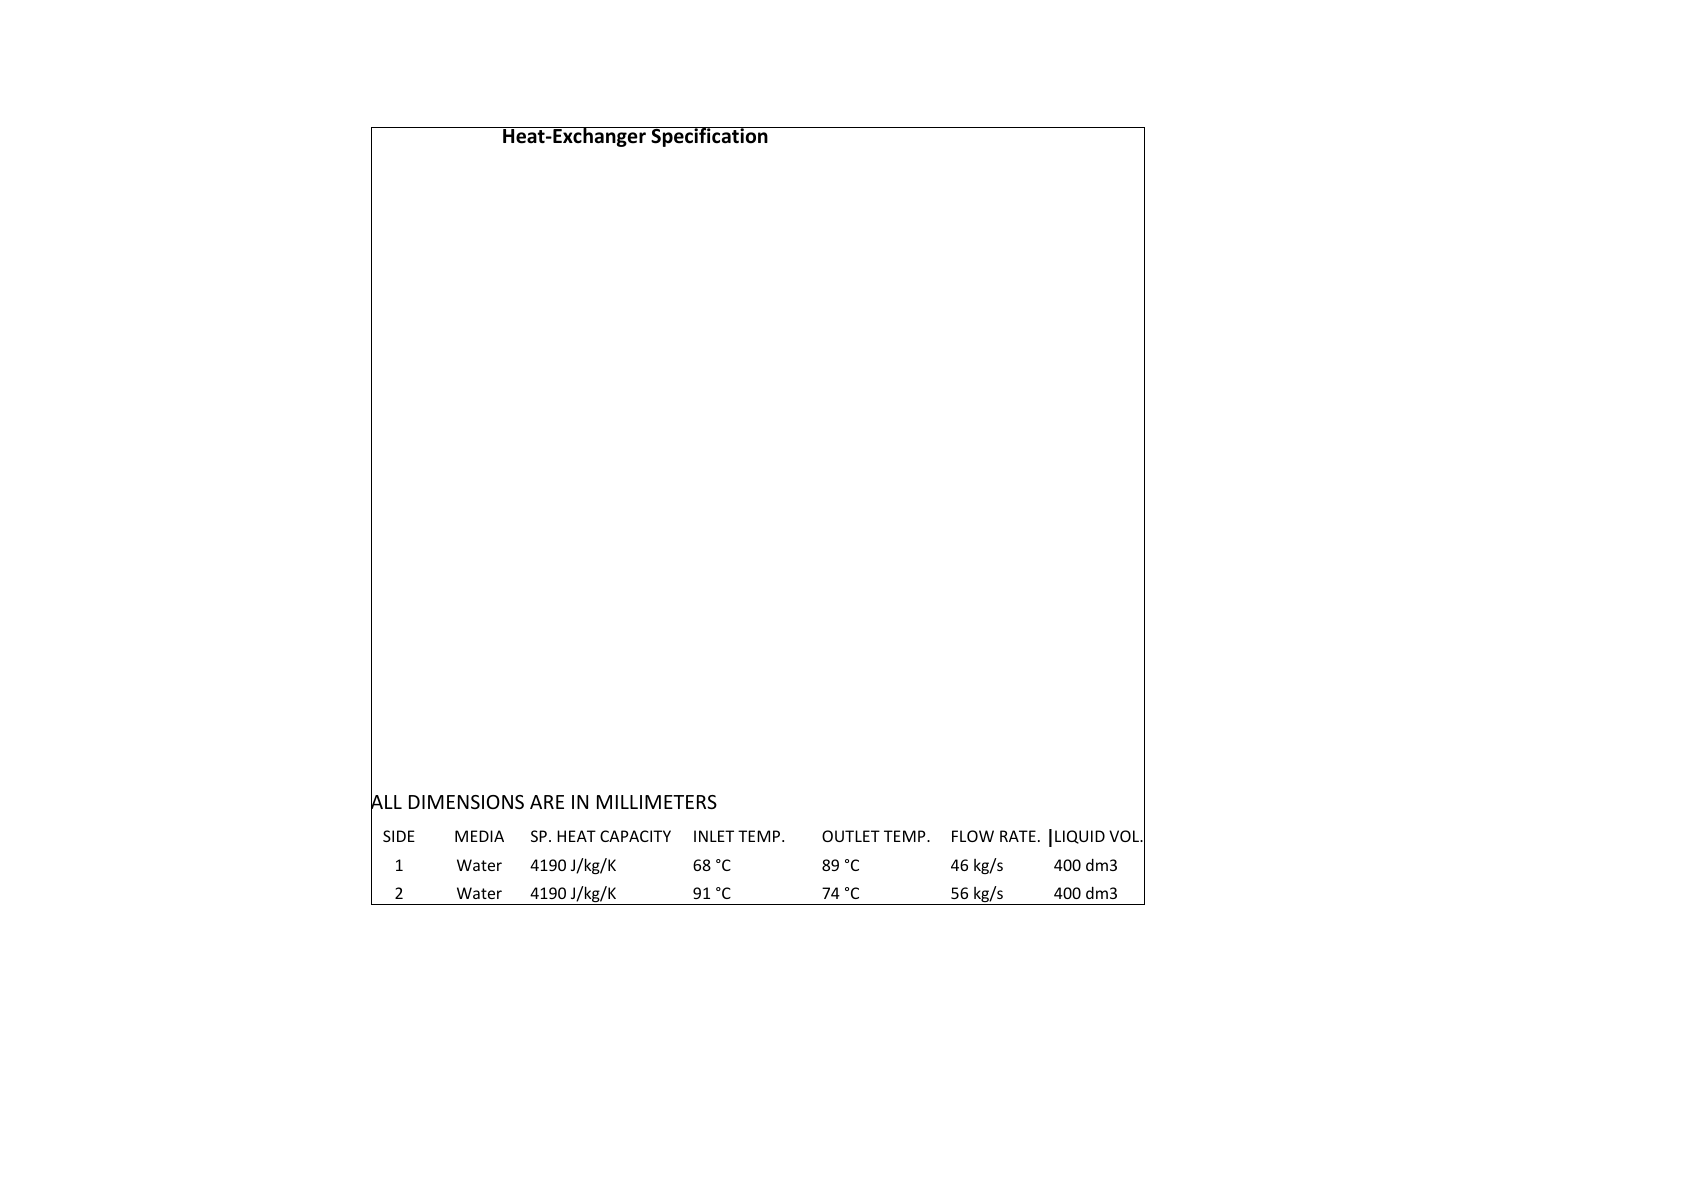

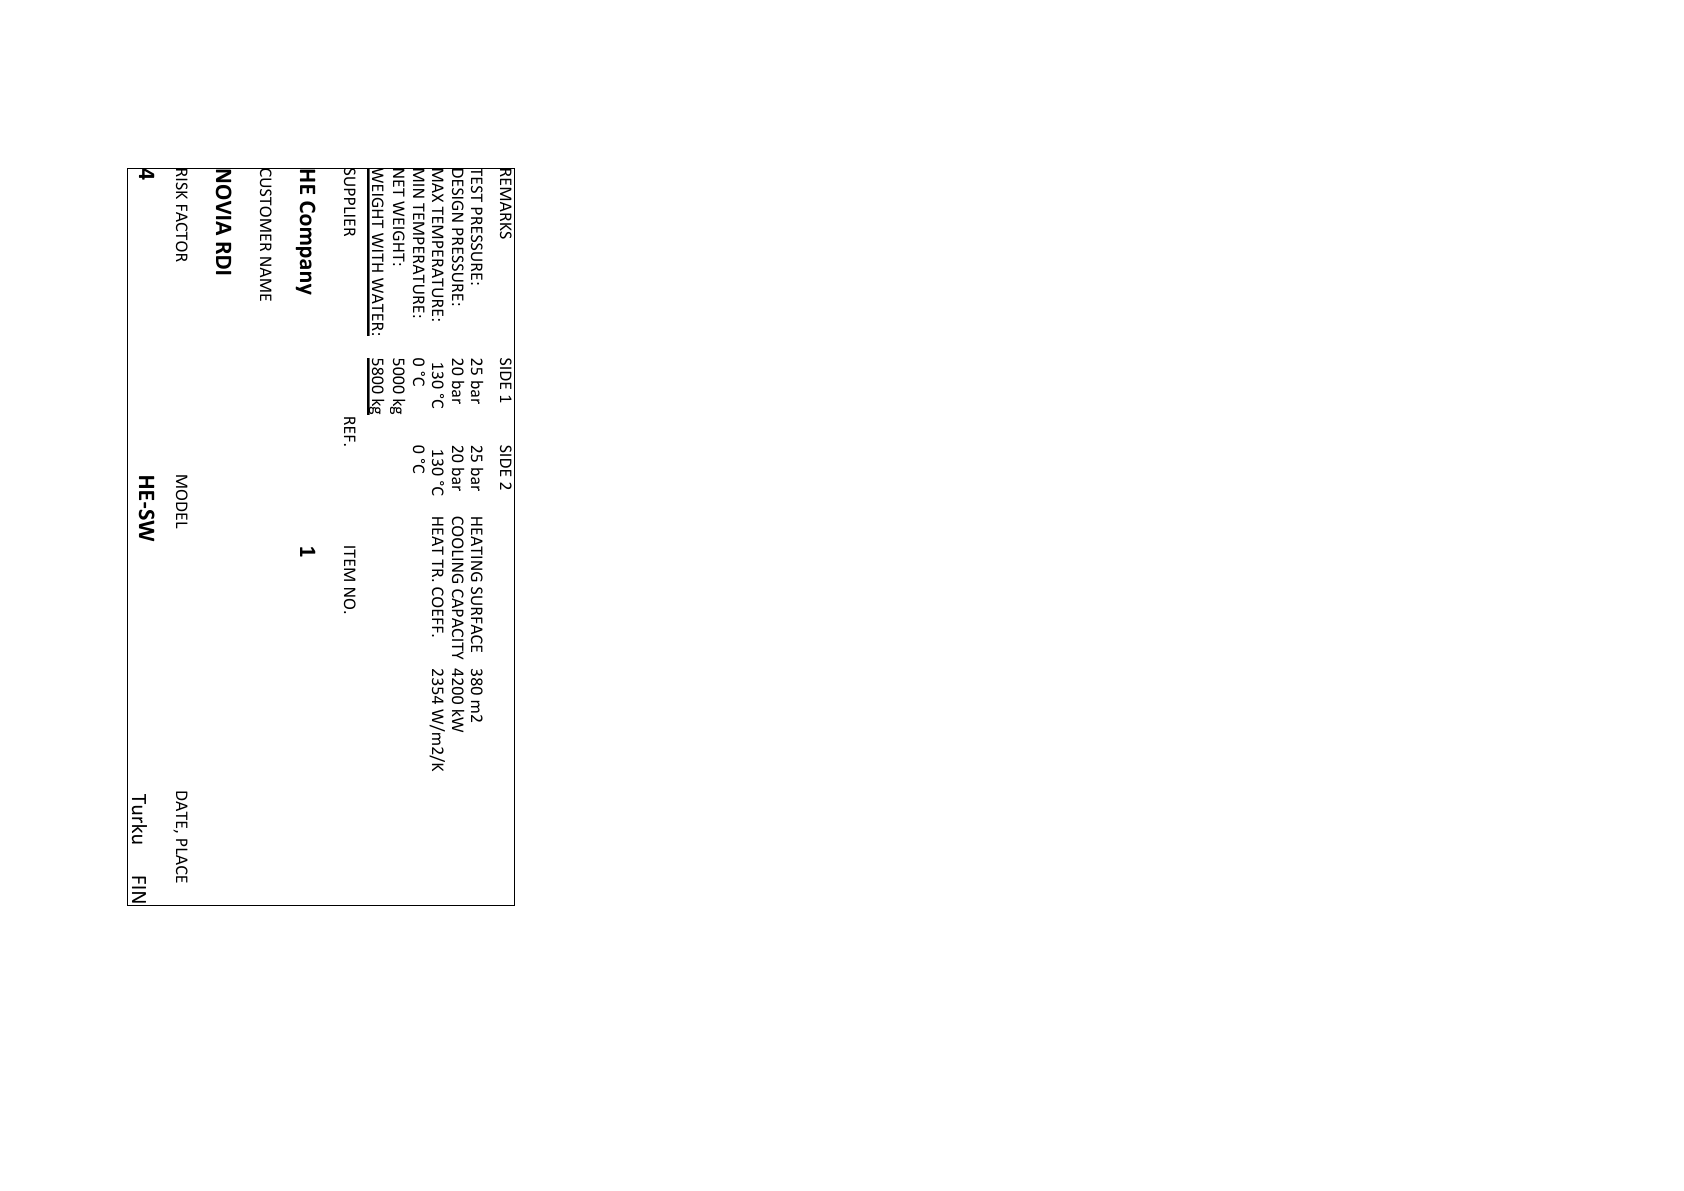

In [178]:
%matplotlib inline
import fitz
from PIL import Image, ImageDraw, ImageFont
from pdf_data_extractor.src.utils import draw_rects, pdf_coords_to_img_coords, extraction_wrapper
 
groupd_ = extract_bboxes_and_dirs(pdf.page_dict)
 
pdf_height, pdf_width = pdf.dimensions
 
pix = pdf.page.get_pixmap(matrix=fitz.Matrix(2, 2))
pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

imgs = {}
im_draws = {}
def get_im_draw(key, w, h):
    if key not in imgs:
        imgs[key] = Image.new("RGB", [w, h], "white")
        #imgs[key] = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        im_draws[key] = ImageDraw.Draw(imgs[key])
    return im_draws[key]

boxes = {}
all_boxes = {}
def update_boxes(key, bbox):
    if key not in boxes:
        boxes[key] = bbox
        all_boxes[key] = []
    all_boxes[key].append(bbox)

    boxes[key] = (
        min(boxes[key][0], bbox[0]),
        min(boxes[key][1], bbox[1]),
        max(boxes[key][2], bbox[2]),
        max(boxes[key][3], bbox[3])
    )


for index, block in enumerate(pdf.page_dict["blocks"]):
    im_bbox = pdf_coords_to_img_coords(block["bbox"], pdf_height, pdf_width, pix.width, pix.height)
    for line in block["lines"]:
        update_boxes(str(line["dir"]), pdf_coords_to_img_coords(line["bbox"], pdf_height, pdf_width, pix.width, pix.height))
        im_draw = get_im_draw(str(line["dir"]), pix.width, pix.height)
        #im_draw.rectangle(im_bbox, outline = "red")
        font = ImageFont.load_default()

        for span in line["spans"]:
            print(span["origin"], span["text"])
            span_bbox = pdf_coords_to_img_coords(span["bbox"], pdf_height, pdf_width, pix.width, pix.height)
            #im_draw.text((text_origin[0], text_origin[1]), span["text"], fill="black", font=font)
            region = pil_image.crop(span_bbox)
            imgs[str(line["dir"])].paste(region, (span_bbox[0], span_bbox[1]))

for key, bbox in boxes.items():
    im_draws[key].rectangle(bbox, outline = "black")
 
for im in imgs.values():
    display(im)

In [173]:
#!pip install scikit-learn

In [198]:

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
clusters = {}
centers = {}
for key, bounding_boxes in all_boxes.items():
    centers[key] = np.array([((x1 + x3) / 2, (y1 + y3) / 2) for x1, y1, x3, y3 in bounding_boxes])
    clusters[key] = DBSCAN(eps=150, min_samples=1).fit(centers[key])  # eps is the max distance between points in a cluster

for key, clustering in clusters.items():

    # Assuming `centers` contains the center points of your bounding boxes
    plt.scatter(centers[key][:, 0], centers[key][:, 1], c=clusters[key].labels_)
    plt.show()
    print(clusters[key].labels_)

ValueError: Found array with dim 3. DBSCAN expected <= 2.

In [167]:
clustering.labels_

array([ 0,  1,  2,  3,  4,  5,  6,  3,  7,  3,  3,  6,  4,  4,  4,  8,  8,
        8,  9,  9,  9,  9,  9,  4,  4,  4,  9,  9,  8,  8, 10, 10, 10, 11,
       11, 11, 12, 13, 12])

How to print text on an image:

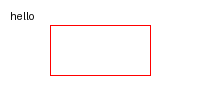

In [172]:
from PIL import Image, ImageDraw, ImageFont

# Create a new blank image
image = Image.new('RGB', (200, 100), 'white')

# Initialize ImageDraw
im_draw = ImageDraw.Draw(image)

# Draw a rectangle (outline)
im_bbox = [50, 25, 150, 75]  # Example bounding box
im_draw.rectangle(im_bbox, outline="red")

# Load a default font
font = ImageFont.load_default()

# Draw text
im_draw.text((10, 10), "hello", fill="black", font=font) # remember the fill..

# Save or display the image
display(image)
